In [1]:
from simulator.utils import *
from detector.utils import *
from detector.detector import *
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# img_size = 2236
img_size = 100
N = 2000 # number of training data


Distribution of Intensity in a Subplot
--------------------------------
1. generate a number of signals with and without atom
2. choose a box around the center
3. plot histogram for intensity
4. create plot for each SNR
5. find threshold line as a function of SNR
6. plot fidelity by applying the model to a set of testing data

In [3]:
# 1

prev_time = time.time()

x0 = img_size // 2 
y0 = img_size // 2 
sim = simulator(img_size, 1)

data_tr_for_different_snr = []
labels_tr_for_different_snr = []
SNR = np.linspace(1, 200, 20)
for snr in SNR:
    data_tr = []
    labels_tr = []
    for i in range(N):
        r = np.random.rand()
        if r > 0.5: 
            labels_tr.append(1)
            data = sim.create_simulation_from_SNR(x0, y0, snr)
            data_tr.append(data)
        else:
            labels_tr.append(0)
            data = sim.create_simulation_from_SNR(x0, y0, snr, no_atom=True)
            data_tr.append(data)
    data_tr_for_different_snr.append(np.array(data_tr))
    labels_tr_for_different_snr.append(np.array(labels_tr))

print(f"time used: {time.time() - prev_time}")


time used: 44.07492232322693


In [4]:
data_tr_for_different_snr = np.array(data_tr_for_different_snr)
labels_tr_for_different_snr = np.array(labels_tr_for_different_snr)

print(data_tr_for_different_snr.shape)
print(labels_tr_for_different_snr.shape)

(20, 2000, 100, 100)
(20, 2000)


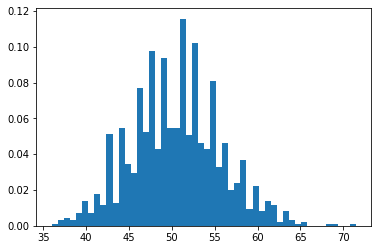

Training accuracy: 0.5470149253731343
Validation accuracy: 0.543939393939394
Threshold: 46.43553508947211
SNR: 1.0


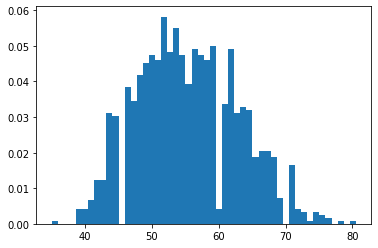

Training accuracy: 0.823134328358209
Validation accuracy: 0.8484848484848485
Threshold: 55.68944039035236
SNR: 11.473684210526315


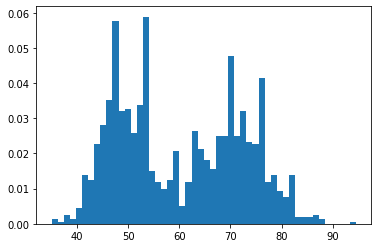

Training accuracy: 0.9679104477611941
Validation accuracy: 0.9742424242424242
Threshold: 59.64250417103939
SNR: 21.94736842105263


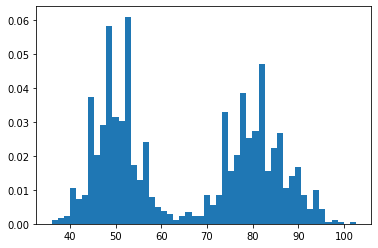

Training accuracy: 0.9925373134328358
Validation accuracy: 0.9954545454545455
Threshold: 60.9707504879682
SNR: 32.421052631578945


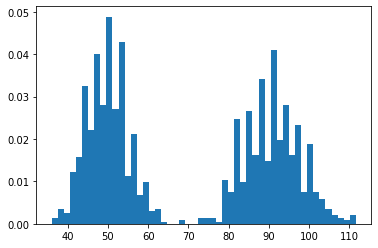

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 64.61472014364304
SNR: 42.89473684210526


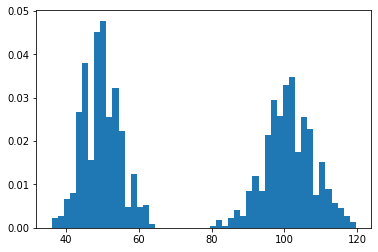

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 64.56702290436031
SNR: 53.368421052631575


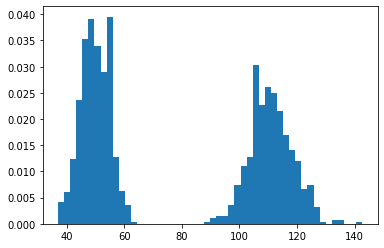

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 63.42412915790631
SNR: 63.84210526315789


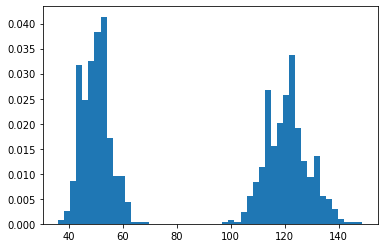

Training accuracy: 0.9977611940298508
Validation accuracy: 1.0
Threshold: 64.69553684739513
SNR: 74.3157894736842


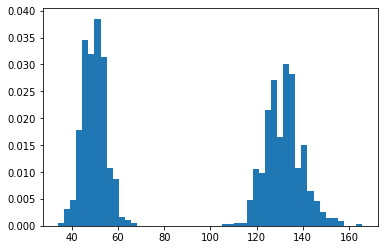

Training accuracy: 0.9985074626865672
Validation accuracy: 1.0
Threshold: 66.43530233618837
SNR: 84.78947368421052


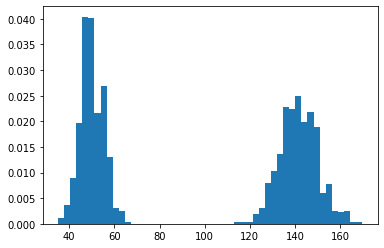

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 65.63735574893983
SNR: 95.26315789473684


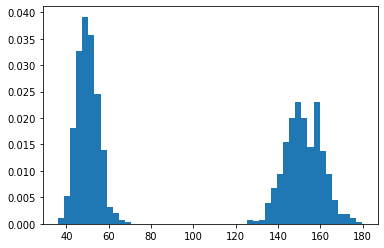

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 66.3887989119518
SNR: 105.73684210526315


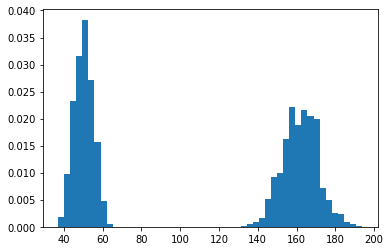

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 65.52295716445005
SNR: 116.21052631578947


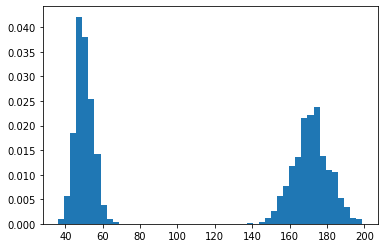

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 72.65524814078518
SNR: 126.68421052631578


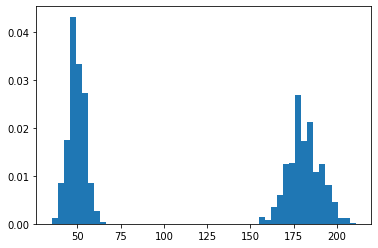

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 65.33589026096814
SNR: 137.15789473684208


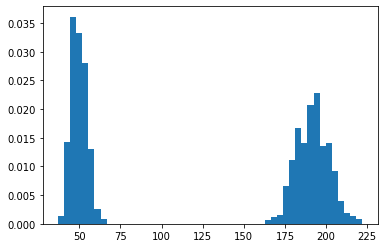

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 65.45909431818234
SNR: 147.6315789473684


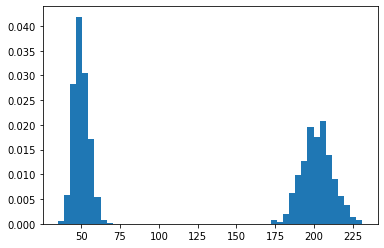

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 71.37485698154221
SNR: 158.10526315789474


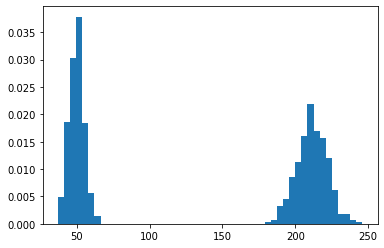

Training accuracy: 0.9955223880597015
Validation accuracy: 1.0
Threshold: 63.13200152216565
SNR: 168.57894736842104


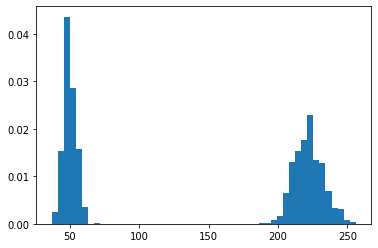

Training accuracy: 0.9992537313432835
Validation accuracy: 1.0
Threshold: 65.14025196556453
SNR: 179.05263157894734


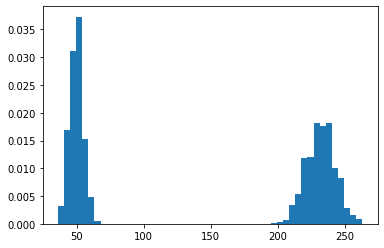

Training accuracy: 0.9985074626865672
Validation accuracy: 1.0
Threshold: 64.13974122133197
SNR: 189.52631578947367


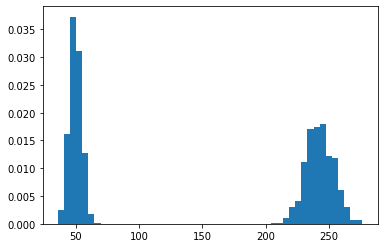

Training accuracy: 1.0
Validation accuracy: 1.0
Threshold: 68.29093927274423
SNR: 200.0
time elapsed: 22.14250159263611


In [12]:
# 2, 3
thresholds = []
accuracies_tr = []
accuracies_val = []
clfs = []

dx = dy = int(2 * np.sqrt(simulator.variance))+1
x0 = y0 = (img_size - dx) // 2

prev_time = time.time()
for i in range(data_tr_for_different_snr.shape[0]):
    
    clf = detector(img_size, x0, y0, dx, dy)
    accuracy_tr, accuracy_val, thresh = clf.train(data_tr_for_different_snr[i], labels_tr_for_different_snr[i], verbose=True)
    print(f"SNR: {SNR[i]}")
    thresholds.append(clf.thresh)
    clfs.append(clf)
    accuracies_tr.append(accuracy_tr)
    accuracies_val.append(accuracy_val)
print(f"time elapsed: {time.time() - prev_time}")

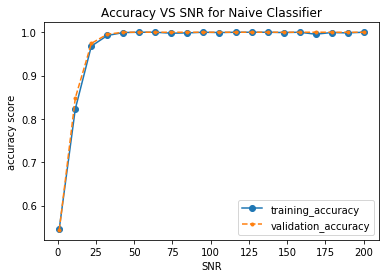

In [13]:
plt.plot(SNR, accuracies_tr, marker='o')
plt.plot(SNR, accuracies_val, marker='.', linestyle='--')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.xlabel("SNR")
plt.ylabel("accuracy score")
plt.title("Accuracy VS SNR for Naive Classifier")
plt.show()

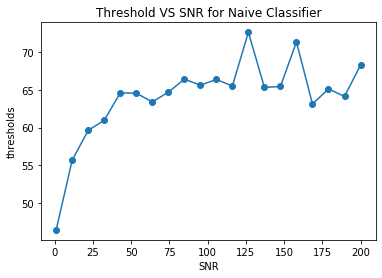

In [14]:
plt.plot(SNR, thresholds, marker='o')
plt.xlabel("SNR")
plt.ylabel("thresholds")
plt.title("Threshold VS SNR for Naive Classifier")
plt.show()

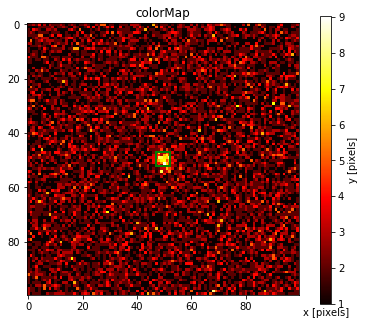

1
[2.         3.         1.         3.         1.         2.
 1.         3.         1.         1.         3.         1.
 1.         1.         3.         1.         3.         3.
 3.         2.         2.         2.         1.         2.
 3.         1.         4.         1.         2.         1.
 1.         2.         2.         2.         1.         3.
 3.00000001 4.00000013 3.00000153 1.00001525 2.00012457 2.00083284
 2.00455891 2.02043161 1.07496966 2.22522129 3.55395499 4.11552837
 3.83919535 5.48265404 8.74375705 6.48265404 4.83919535 4.11552837
 1.55395499 1.22522129 3.07496966 3.02043161 2.00455891 2.00083284
 2.00012457 2.00001525 1.00000153 2.00000013 2.00000001 3.
 2.         3.         2.         5.         2.         2.
 2.         3.         2.         2.         1.         4.
 2.         1.         1.         1.         1.         3.
 2.         2.         3.         4.         2.         1.
 1.         2.         4.         4.         2.         1.
 1.         1.        

In [18]:
idx=3

snr_idx = 9
a = data_tr_for_different_snr[snr_idx][idx]
b = labels_tr_for_different_snr[snr_idx][idx]
# print(clf)
clf = clfs[snr_idx]
clf.visualize_data(a)
print(b)
print(a[51])

In [19]:
print(clf.dy)

5
